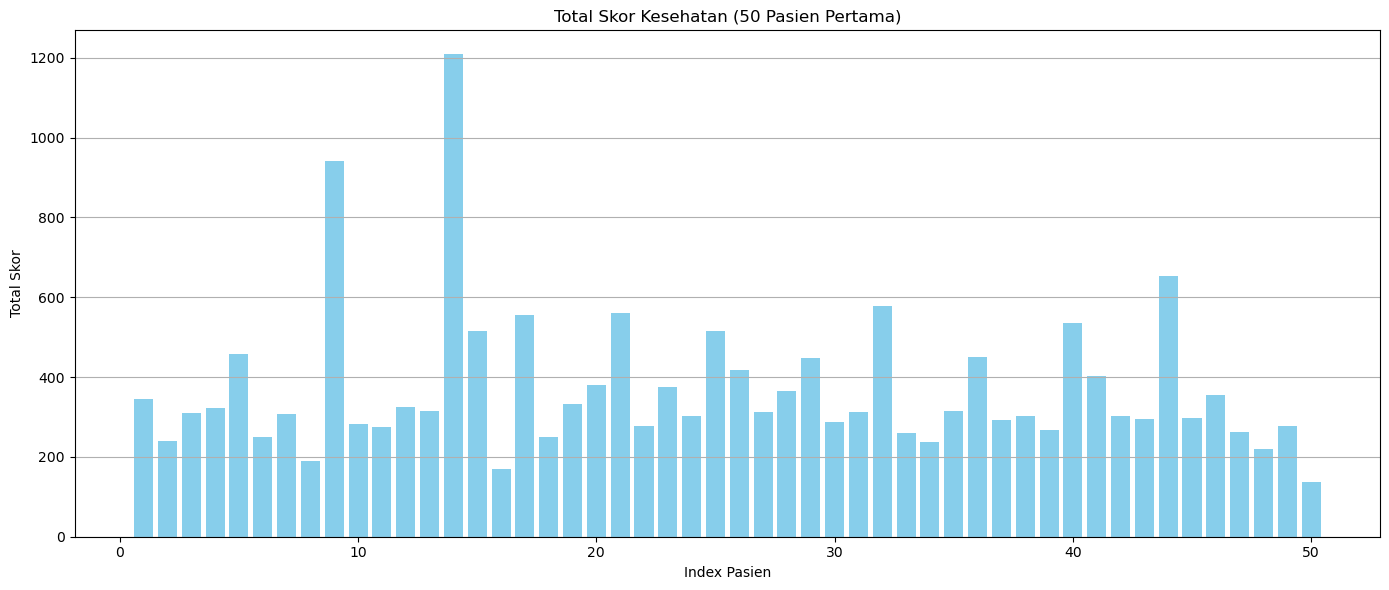

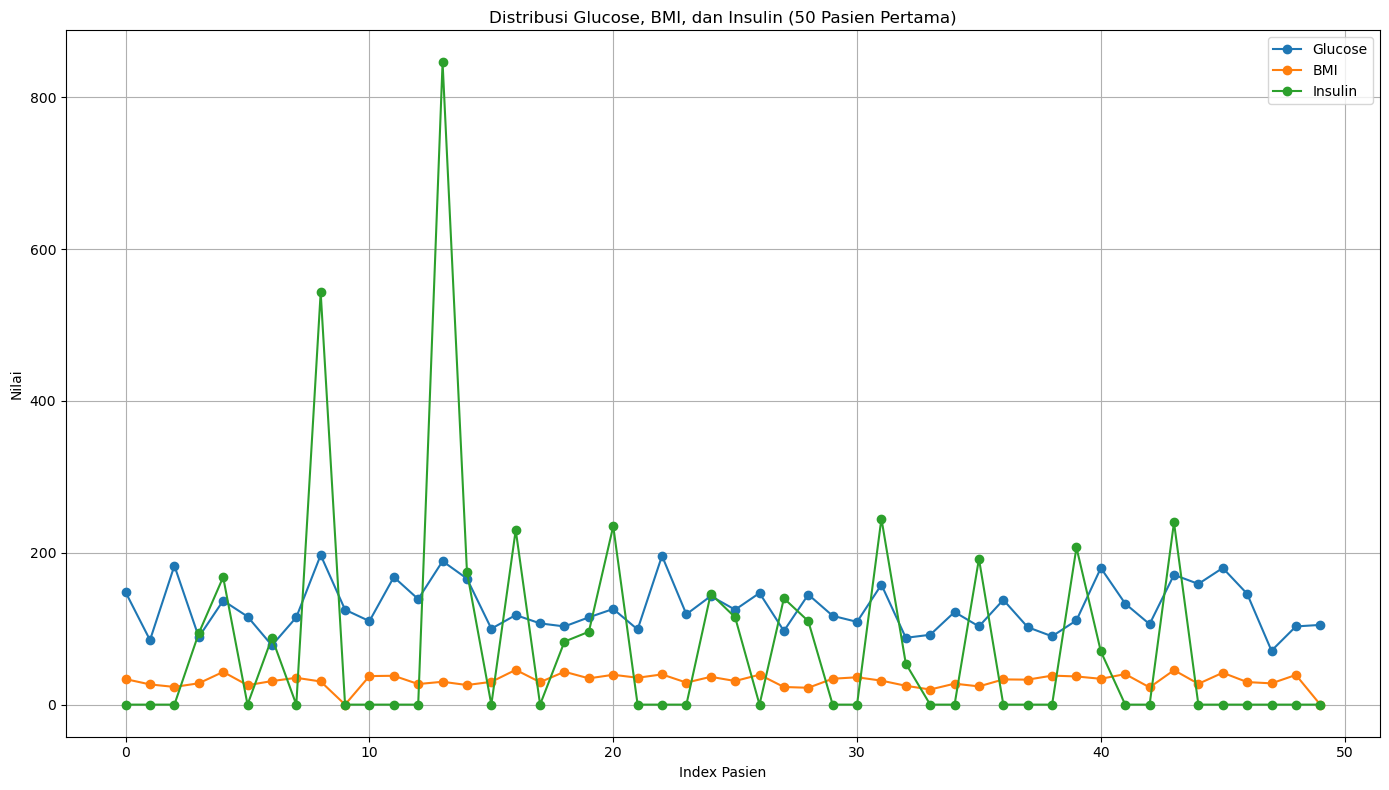

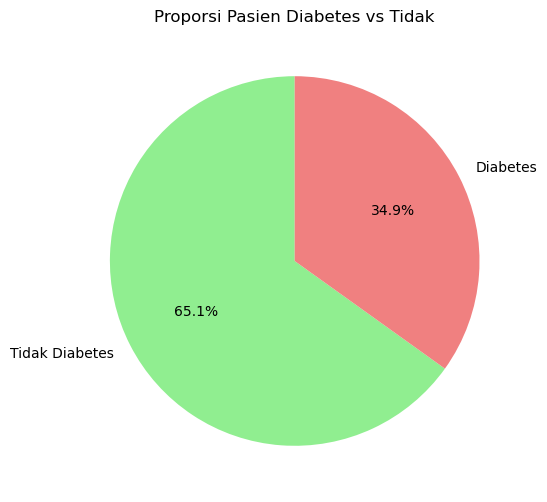

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Prediksi Total Skor Pasien ke-769: 362.32


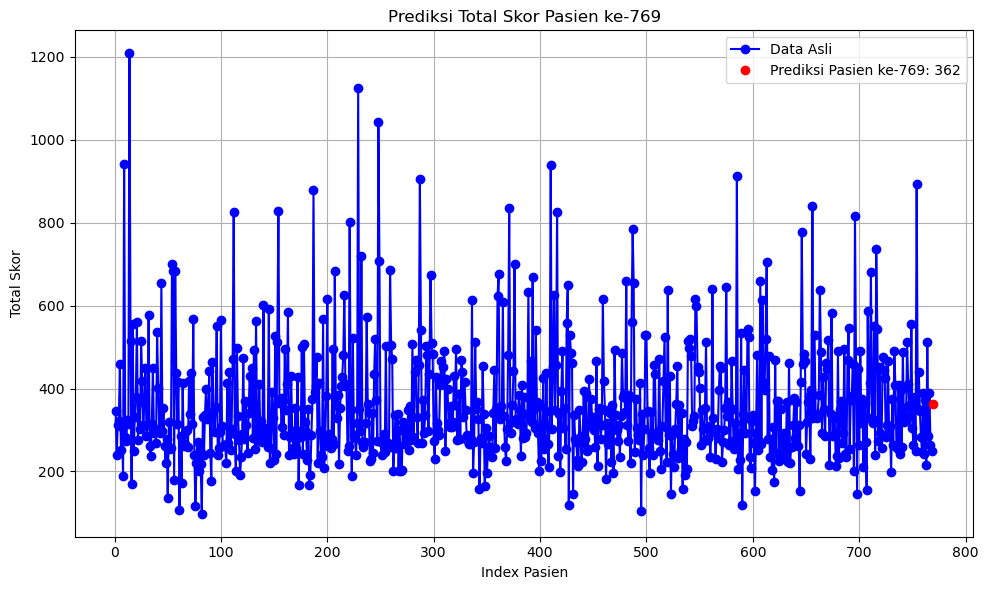

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("diabetes.csv") 

df['Total_Skor'] = df[['Pregnancies', 'Glucose', 'BloodPressure', 
                       'SkinThickness', 'Insulin', 'BMI', 
                       'DiabetesPedigreeFunction', 'Age']].sum(axis=1)

plt.figure(figsize=(14,6))
plt.bar(np.arange(1, 51), df['Total_Skor'][:50], color='skyblue')
plt.title("Total Skor Kesehatan (50 Pasien Pertama)")
plt.xlabel("Index Pasien")
plt.ylabel("Total Skor")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,8))
for fitur in ['Glucose', 'BMI', 'Insulin']:
    plt.plot(df.index[:50], df[fitur][:50], marker='o', label=fitur)
plt.title("Distribusi Glucose, BMI, dan Insulin (50 Pasien Pertama)")
plt.xlabel("Index Pasien")
plt.ylabel("Nilai")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
df['Outcome'].value_counts().plot.pie(
    labels=['Tidak Diabetes', 'Diabetes'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'lightcoral']
)
plt.title("Proporsi Pasien Diabetes vs Tidak")
plt.ylabel("")
plt.show()

df['Index_Pasien'] = np.arange(1, len(df)+1)
X = df[['Index_Pasien']]
y = df['Total_Skor']

model = LinearRegression()
model.fit(X, y)

prediksi = model.predict([[769]])[0]
print(f"Prediksi Total Skor Pasien ke-769: {prediksi:,.2f}")

plt.figure(figsize=(10,6))
plt.plot(df['Index_Pasien'], y, 'bo-', label='Data Asli')
plt.plot(769, prediksi, 'ro', label=f'Prediksi Pasien ke-769: {prediksi:,.0f}')
plt.xlabel("Index Pasien")
plt.ylabel("Total Skor")
plt.title("Prediksi Total Skor Pasien ke-769")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()